# **Artist discogrpahy**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

**Spotify API**

In [3]:
client_ID = 'your client id'
client_SECRET = 'your client secret'

In [4]:
client_credentials_manager = SpotifyClientCredentials(client_ID, client_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

**Show artist albums and tracks**

In [5]:
# Artist ID
def get_artist(name):
    results = sp.search(q='artist:' + name, type='artist')
    items = results['artists']['items']
    if len(items) > 0:
        return items[0]
    else:
        return None

In [6]:
# Album track
def show_album_tracks(album):
    tracks = []
    results = sp.album_tracks(album['id'])
    tracks.extend(results['items'])
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    for i, track in enumerate(tracks):
        print(i+1, track['name'])

In [7]:
# Album name
def show_artist_albums(artist):
    albums = []
    results = sp.artist_albums(artist['id'], album_type='album')
    albums.extend(results['items'])
    while results['next']:
        results = sp.next(results)
        albums.extend(results['items'])
    print('Total albums: ', len(albums))
    unique = set()  # skip duplicate albums
    for album in albums:
        name = album['name']
        if name not in unique:
            print('ALBUM: ', name)
            unique.add(name)
            show_album_tracks(album)

In [8]:
# Artist detail
def show_artist(artist):
    print('Artist: ', artist['name'])
    print('Popularity: ', artist['popularity'])
    if len(artist['genres']) > 0:
        print('Genres: ', ','.join(artist['genres']))

In [9]:
# Main
artist = get_artist('Taylor Swift')
show_artist(artist)
show_artist_albums(artist)

Artist:  Taylor Swift
Popularity:  100
Genres:  pop
Total albums:  64
ALBUM:  Red (Taylor's Version)
1 State Of Grace (Taylor's Version)
2 Red (Taylor's Version)
3 Treacherous (Taylor's Version)
4 I Knew You Were Trouble (Taylor's Version)
5 All Too Well (Taylor's Version)
6 22 (Taylor's Version)
7 I Almost Do (Taylor's Version)
8 We Are Never Ever Getting Back Together (Taylor's Version)
9 Stay Stay Stay (Taylor's Version)
10 The Last Time (feat. Gary Lightbody of Snow Patrol) (Taylor’s Version)
11 Holy Ground (Taylor's Version)
12 Sad Beautiful Tragic (Taylor's Version)
13 The Lucky One (Taylor's Version)
14 Everything Has Changed (feat. Ed Sheeran) (Taylor’s Version)
15 Starlight (Taylor's Version)
16 Begin Again (Taylor's Version)
17 The Moment I Knew (Taylor's Version)
18 Come Back...Be Here (Taylor's Version)
19 Girl At Home (Taylor's Version)
20 State Of Grace (Acoustic Version) (Taylor's Version)
21 Ronan (Taylor's Version)
22 Better Man (Taylor's Version) (From The Vault)
23 N

1 Welcome to New York - Commentary
2 Welcome To New York
3 Blank Space - Commentary
4 Blank Space
5 Style - Commentary
6 Style
7 Out Of The Woods - Commentary
8 Out Of The Woods
9 All You Had To Do Was Stay - Commentary
10 All You Had To Do Was Stay
11 Shake It Off - Commentary
12 Shake It Off
13 I Wish You Would - Commentary
14 I Wish You Would
15 Bad Blood - Commentary
16 Bad Blood
17 Wildest Dreams - Commentary
18 Wildest Dreams
19 How You Get The Girl - Commentary
20 How You Get The Girl
21 This Love - Commentary
22 This Love
23 I Know Places - Commentary
24 I Know Places
25 Clean - Commentary
26 Clean
ALBUM:  Taylor Swift Karaoke: 1989 (Deluxe Edition)
1 Welcome To New York - Karaoke Version
2 Blank Space - Karaoke Version
3 Style - Karaoke Version
4 Out Of The Woods - Karaoke Version
5 All You Had To Do Was Stay - Karaoke Version
6 Shake It Off - Karaoke Version
7 I Wish You Would - Karaoke Version
8 Bad Blood - Karaoke Version
9 Wildest Dreams - Karaoke Version
10 How You Get Th

1 Mine
2 Sparks Fly
3 Back To December
4 Speak Now
5 Dear John
6 Mean
7 The Story Of Us
8 Never Grow Up
9 Enchanted
10 Better Than Revenge
11 Innocent
12 Haunted
13 Last Kiss
14 Long Live
15 Ours
16 If This Was A Movie
17 Superman
18 Back To December - Acoustic
19 Haunted - Acoustic Version
20 Mine - POP Mix
ALBUM:  Speak Now (US Version)
1 Mine
2 Sparks Fly
3 Back To December
4 Speak Now
5 Dear John
6 Mean
7 The Story Of Us
8 Never Grow Up
9 Enchanted
10 Better Than Revenge
11 Innocent
12 Haunted
13 Last Kiss
14 Long Live
ALBUM:  Speak Now (Deluxe Package)
1 Mine - POP Mix
2 Sparks Fly
3 Back To December
4 Speak Now
5 Dear John
6 Mean
7 The Story Of Us
8 Never Grow Up
9 Enchanted
10 Better Than Revenge
11 Innocent
12 Haunted
13 Last Kiss
14 Long Live
15 Ours
16 If This Was A Movie
17 Superman
18 Back To December - Acoustic
19 Haunted - Acoustic Version
20 Mine
21 Back To December
22 The Story Of Us
ALBUM:  Fearless
1 Fearless
2 Fifteen
3 Love Story
4 Hey Stephen
5 White Horse
6 You Be

**Get the Raw data**

In [10]:
# All Track ID of artist
def get_track_id(artist):    
    albums = []
    tracks = []
    trackID = []
    al_id = sp.artist_albums(artist['id'], album_type='album')
    albums.extend(al_id['items'])
    while al_id['next']:
        al_id = sp.next(al_id)
        albums.extend(al_id['items'])
    unique = set()  # skip duplicate albums
    for album in albums:
        album_id = album['id']
        if album_id not in unique:
            unique.add(album_id)
            tracks = sp.album_tracks(album_id)
            for i, track in enumerate(tracks['items']):
                trackID.append(track['id'])
    return trackID

In [11]:
ids = get_track_id(artist)

In [12]:
# Track features and metadata
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']

    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, release_date, length, popularity, 
             acousticness, danceability, energy, instrumentalness, liveness, loudness, 
             speechiness, tempo, time_signature]
    return track

In [13]:
tracks = []
for i in range(len(ids)):
    track = getTrackFeatures(ids[i])
    tracks.append(track)

**To CSV**

In [14]:
df = pd.DataFrame(tracks, columns = [
    'name', 'album', 'artist', 'release_date', 'length', 'popularity', 
    'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
    'speechiness', 'tempo', 'time_signature'])
df.to_csv("artist_discography.csv", sep = ',')

In [16]:
df.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,State Of Grace (Taylor's Version),Red (Taylor's Version),Taylor Swift,2021-11-12,295413,83,0.000328,0.594,0.713,0.000000,0.1140,-5.314,0.0503,129.958,4
1,Red (Taylor's Version),Red (Taylor's Version),Taylor Swift,2021-11-12,223093,85,0.001080,0.516,0.777,0.000002,0.0761,-4.908,0.0375,125.047,4
2,Treacherous (Taylor's Version),Red (Taylor's Version),Taylor Swift,2021-11-12,242720,82,0.034400,0.645,0.593,0.000127,0.1300,-6.506,0.0288,109.984,4
3,I Knew You Were Trouble (Taylor's Version),Red (Taylor's Version),Taylor Swift,2021-11-12,219760,83,0.012900,0.584,0.557,0.000000,0.0576,-6.371,0.0342,154.008,4
4,All Too Well (Taylor's Version),Red (Taylor's Version),Taylor Swift,2021-11-12,329160,84,0.017100,0.440,0.528,0.002030,0.2340,-7.809,0.0317,185.972,4


**Exploratory Data Analysis**

This EDA specifically for Taylor Swift, if you want to use another artist, maybe it has different EDA

In [31]:
df['year'] = df['release_date'].map(lambda x: x.split('-')[0]).astype(int)

In [32]:
popularity = df[['year', 'popularity', 'album', 'name']].sort_values(by='popularity', ascending=False).iloc[:20]

In [33]:
popularity

,year,popularity,album,name
29,2021,90,Red (Taylor's Version),All Too Well (10 Minute Version) (Taylor's Ver...
1,2021,85,Red (Taylor's Version),Red (Taylor's Version)
4,2021,84,Red (Taylor's Version),All Too Well (Taylor's Version)
0,2021,83,Red (Taylor's Version),State Of Grace (Taylor's Version)
270,2020,83,folklore,exile (feat. Bon Iver)
22,2021,83,Red (Taylor's Version),Nothing New (feat. Phoebe Bridgers) (Taylor’s ...
3,2021,83,Red (Taylor's Version),I Knew You Were Trouble (Taylor's Version)
27,2021,83,Red (Taylor's Version),Run (feat. Ed Sheeran) (Taylor’s Version) (Fro...
604,2014,82,1989 (Deluxe),Blank Space
25,2021,82,Red (Taylor's Version),I Bet You Think About Me (feat. Chris Stapleto...


Text(0.5, 1.0, '20 Most Popular Songs')

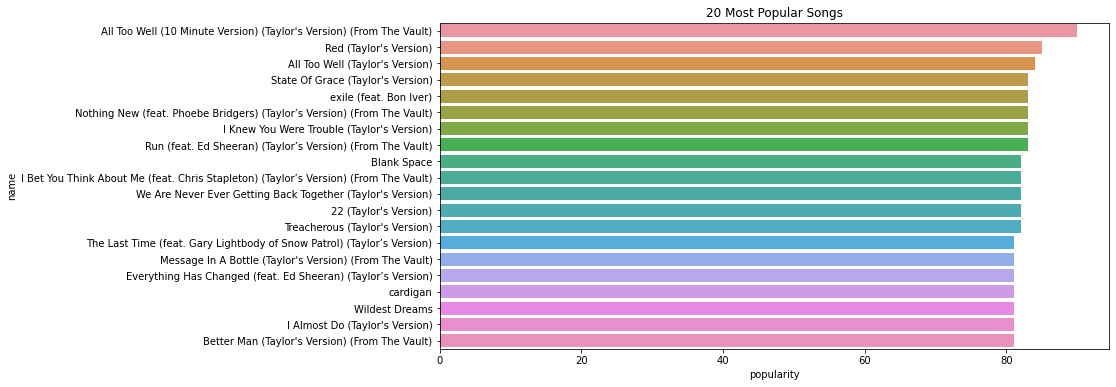

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(data=popularity, y='name', x='popularity')
plt.title('20 Most Popular Songs')

Text(0.5, 1.0, 'Popularity of Artist')

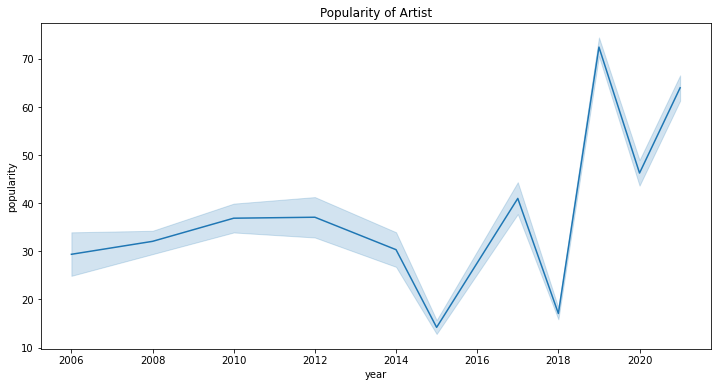

In [41]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['year'], y=df['popularity'], sort=True)
plt.title('Popularity of Artist')

There is a low popularity around 2014 to 2016 when taylor swift remove her songs from streaming platform

In [71]:
df['byalbum'] = df['album'].map(lambda x: x.split('(')[0])

In [73]:
df['byalbum'] = df['byalbum'].str.replace(' ','', regex=True)

In [79]:
album_score = df.groupby('byalbum')['popularity'].sum()

In [82]:
album_score.head()

byalbum
1989                                5389
Fearless                            6170
FearlessKaraoke                       82
FearlessPlatinumEdition              902
LiveFromClearChannelStripped2008     262
Name: popularity, dtype: int64

Text(0.5, 1.0, "Most Popular Album (Ignore The Version of Album i.e Taylor's Version, Deluxe Edition and etc.)")

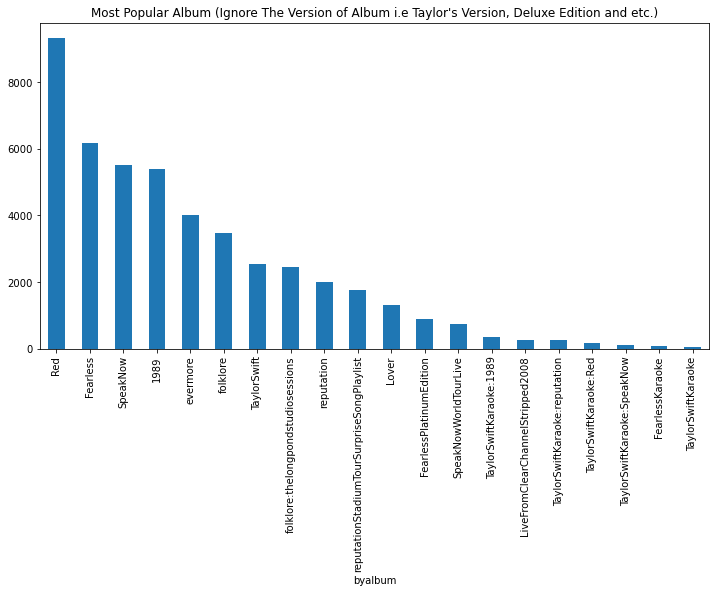

In [99]:
plt.figure(figsize=(12,6))
album_score.sort_values(ascending=False).plot(kind='bar')
plt.title("Most Popular Album (Ignore The Version of Album i.e Taylor's Version, Deluxe Edition and etc.)")